# Social Media Alternative Data: Practitioner Field Guide

This notebook addresses Part 2 of the "Evaluating One Particular Type of Alternative Data" assignment by focusing on the social media subcategory described by Sun et al. (2024). We mirror the tone and structure of the WorldQuant University reports: we set expectations up front, provide a practitioner oriented briefing, and demonstrate a reproducible Python workflow against the repository's sample comments.


## Assignment Structure

We follow the Sun et al. (2024) framing for the social media subcategory and address the required deliverables:

1. **Sources of data**: inventory primary and secondary acquisition channels for social media data feeds.
2. **Types of data**: describe the content modalities, metadata, and derived signals available from social networks.
3. **Quality of data**: assess data fidelity, coverage, latency, bias, and mitigation tactics.
4. **Ethical issues**: outline compliance, privacy, and governance considerations.
5. **Python code to import and structure**: load, clean, and normalize a representative dataset from this repository.
6. **Exploratory data analysis**: generate descriptive analytics that an investment researcher can use as a first validation step.
7. **Literature connections**: surface recent peer reviewed work that cites or advances social media based investing research.

## 1. Sources of Social Media Data

Sun et al. (2024, Table 1) classify social media within the behavioral branch of alternative data, highlighting its timeliness and investor focus. The table below summarizes practical acquisition paths for the platforms most frequently used in financial analytics.

| Source | Access path | Coverage highlights | Licensing notes |
| --- | --- | --- | --- |
| X (Twitter) | Official API v2 tiers (Basic, Elevated, Academic) or enterprise firehose resellers (e.g., Gnip) | Real time public tweets, engagement metrics, limited user metadata | Strict terms on redistribution and display; commercial pricing scales with volume |
| Reddit | Pushshift API, Google BigQuery public datasets, direct moderator exports | Community level discussions, subreddit level metadata, upvote ratios | Pushshift is best effort; Reddit TOS requires attribution and rate limiting |
| Stocktwits | REST streaming API, Kaggle mirrors, Quandl archives | Ticker tagged investor chatter, bull/bear votes | Must display message attribution; rate limited without paid plan |
| Weibo / Chinese forums | Data vendors (e.g., MioTech, Wind) or internal scrapers | Mandarin sentiment around A share equities and macro events | PRC cybersecurity law requires domestic processing and consent |
| Discord / Telegram | Bot integrations, community exports, specialized vendors like Lucca | Order flow chat rooms, crypto coordination channels | Private groups often require opt in consent; scraping can violate platform rules |
| News verified accounts | RSS feeds, GDELT, Dow Jones family APIs | Fact checked headlines that spread quickly on social media | Licensing restrictions vary; redistribution may be prohibited |

Practitioners usually blend premium feeds (for uptime guarantees) with open archives to backfill historical coverage. Vendor scorecards should include uptime SLAs, latency benchmarks, sampled message counts, and the NDAs required for redistribution inside the firm.

## 2. Types of Data Available

Social platforms emit more than raw text. A typical investment grade dataset contains the following layers:

- **Core content**: post body text, titles, replies, quoted retweets, markdown formatting, code blocks, and embedded URLs.
- **Engagement metadata**: likes, upvotes, shares, comment counts, view counts, and repost metrics that approximate reach.
- **Entity annotations**: ticker tags (e.g., $TSLA), hashtags, user mentions, and auto detected company entities via named entity recognition.
- **User level features**: account age, self reported location, verified status, karma or reputation scores, historical posting cadence.
- **Temporal context**: creation timestamp, edit history, deletion signals, cross posted links, and server side latency stamps.
- **Network structure**: follower graphs, reply trees, community membership, and conversation clusters built from interaction edges.
- **Derived analytics**: lexicon or transformer based sentiment scores, topic clusters, embeddings, and abnormal activity flags.

Aligning these modalities with firm objectives is critical. For example, day trading desks prioritize millisecond level timestamps and abnormal mention counts, while macro researchers emphasize longer horizon trend scores extracted from embeddings.

## 3. Data Quality Considerations

Although social media data are high frequency and inexpensive, the raw feeds contain substantial noise. A pragmatic quality checklist includes:

- **Coverage**: platforms throttle historical access. Verify completeness by cross checking daily post counts against public dashboards.
- **Latency**: APIs can lag during load spikes. Track post arrival times and implement backfill jobs to recover missed windows.
- **Authenticity**: bot driven amplification distorts sentiment. Apply bot detection features (posting velocity, follower ratios, entropy tests) and remove suspicious accounts.
- **Representativeness**: social users skew young, tech savvy, and often overweight crypto or meme assets. Weight aggregates by sector coverage or blend with fundamental data.
- **Language and spam**: multi language posts, copy pasta, and promotional spam degrade NLP scores. Maintain language detection and rule based filters.
- **Data drift**: platform policy changes (rate limits, field deprecation) alter schema quality. Version pin data pipelines and monitor schema diffs.
- **Ground truth alignment**: backtest against known events (earnings, macro releases) to confirm that sentiment spikes align with factual catalysts.

Documenting these diagnostics satisfies model risk governance and guides periodic recalibration of scraping or vendor ingestion pipelines.

## 4. Ethical and Governance Issues

Using social media data in finance intersects with privacy, compliance, and responsible AI requirements:

- **Consent and terms of service**: adhere to each platform's developer agreement. Unauthorized scraping can trigger IP bans or legal action.
- **Personal data minimization**: strip or hash user identifiers unless explicit consent exists. Align storage practices with GDPR, CCPA, and similar privacy regimes.
- **Bias and fairness**: communities over represent certain demographics, leading to biased signals. Stress test signals for disparate impact before integrating into investment decisions.
- **Misinformation and market abuse**: rumor propagation can violate securities laws if used to manipulate prices. Maintain surveillance workflows to detect coordinated pump and dump behavior.
- **Explainability**: regulators increasingly expect interpretable signals. Retain audit trails of preprocessing, model versions, and data lineage for any derived factor.
- **Data retention**: define retention periods, deletion procedures, and incident response plans in collaboration with compliance and legal teams.

Sun et al. (2024) emphasize that ethical adoption is a prerequisite for sustained alpha generation, especially as alternative data move closer to mainstream regulatory scrutiny.

## 5. Python Workflow: Importing and Structuring Repository Samples

To keep this user guide reproducible, we leverage the bundled Reddit comments file at `./reddit_comments.csv`. The workflow illustrates how to:

1. Load timestamped posts into a pandas DataFrame.
2. Normalize text fields, parse pre tokenized columns, and engineer lightweight quality metrics.
3. Produce summary tables that an analyst can review before spending credits on premium feeds.


In [5]:
from pathlib import Path
import ast
import pandas as pd

DATA_PATH = Path('./reddit_comments.csv')

df = pd.read_csv(DATA_PATH, parse_dates=['created_utc'])
df['text'] = df['text'].fillna('').str.replace(r'\s+', ' ', regex=True).str.strip()
df['subreddit'] = df['subreddit'].fillna('unknown')
df['tokens'] = df['tokenized'].apply(ast.literal_eval)
df['word_count'] = df['tokens'].apply(lambda toks: len([t for t in toks if t.strip()]))
df['char_count'] = df['text'].str.len()
df['hour'] = df['created_utc'].dt.floor('H')
df.head()

/var/folders/rq/7sbky2g96jdgj8pp88lw9tnw0000gn/T/ipykernel_80412/4247279232.py:13: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['hour'] = df['created_utc'].dt.floor('H')


,created_utc,text,subreddit,tokenized,bull_count,bear_count,sia,tokens,word_count,char_count,hour
0,2024-07-01 09:17:47,**TL;DR** >Metaplanet's recent Bitcoin purchas...,cryptocurrency,"['*', '*', 'tl', ';', 'dr', '*', '*', '>', 'me...",0,0,0.4939,"[*, *, tl, ;, dr, *, *, >, metaplanet, 's, rec...",57,295,2024-07-01 09:00:00
1,2024-07-01 09:20:20,"tldr; Metaplanet, a Tokyo Stock Exchange-liste...",cryptocurrency,"['tldr', ';', 'metaplanet', ',', 'a', 'tokyo',...",0,0,0.9287,"[tldr, ;, metaplanet, ,, a, tokyo, stock, exch...",128,699,2024-07-01 09:00:00
2,2024-07-01 09:44:39,Me likey,cryptocurrency,"['me', 'likey']",0,0,0.0000,"[me, likey]",2,8,2024-07-01 09:00:00
3,2024-07-01 10:20:49,Governments shouldn't be allowed to buy crypto,cryptocurrency,"['governments', 'should', ""n't"", 'be', 'allowe...",1,0,0.0000,"[governments, should, n't, be, allowed, to, bu...",8,46,2024-07-01 10:00:00
4,2024-07-01 10:28:17,Why? Isnt it a free market,cryptocurrency,"['why', '?', 'isnt', 'it', 'a', 'free', 'market']",0,0,-0.4023,"[why, ?, isnt, it, a, free, market]",7,26,2024-07-01 10:00:00


The dataset consists of timestamped cryptocurrency discussions from Reddit, enriched with pre-computed sentiment scores (bull_count, bear_count, sia) and lightweight text-quality metrics (word and character counts). These serve as inputs for spam screening and for calibrating downstream NLP models.

In [6]:

record_count = len(df)
subreddit_count = df['subreddit'].nunique()
start = df['created_utc'].min()
end = df['created_utc'].max()
null_share = df['text'].eq('').mean()
avg_words = df['word_count'].mean()
median_sentiment = df['sia'].median()

summary = pd.DataFrame(
    {
        'metric': [
            'records',
            'unique_subreddits',
            'coverage_window_start',
            'coverage_window_end',
            'empty_text_ratio',
            'avg_words_per_post',
            'median_vader_sentiment'
        ],
        'value': [
            record_count,
            subreddit_count,
            start,
            end,
            round(null_share, 4),
            round(avg_words, 2),
            round(median_sentiment, 4)
        ]
    }
)
summary

,metric,value
0,records,31825
1,unique_subreddits,1
2,coverage_window_start,2024-07-01 09:17:47
3,coverage_window_end,2024-07-23 14:57:42
4,empty_text_ratio,0.0
5,avg_words_per_post,28.64
6,median_vader_sentiment,0.0


The dataset spans roughly three weeks of Reddit cryptocurrency discussions, covering 31.8 K posts from a single subreddit.
Text completeness is excellent (0 % empty), with an average of ~29 words per post, confirming the conversational nature of the data.
The median VADER sentiment of 0.0 indicates neutral aggregate tone, with meaningful polarity captured only in the tails.
Such quick metrics are routinely used in data-quality assurance and for defining baselines before sentiment model calibration or anomaly screening.

## 6. Exploratory Data Analysis of the Sample

Exploratory work transforms raw posts into decision ready indicators. Below we profile comment cadence, vocabulary, and sentiment dispersion with a lemmatized TF-IDF pipeline that applies NLTK stopword lists and domain-specific filters before surfacing the highest-signal terms.

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/huayitang/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
/var/folders/rq/7sbky2g96jdgj8pp88lw9tnw0000gn/T/ipykernel_80412/3721364907.py:43: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  cadence = df.set_index('created_utc').resample('3H')['text'].count()


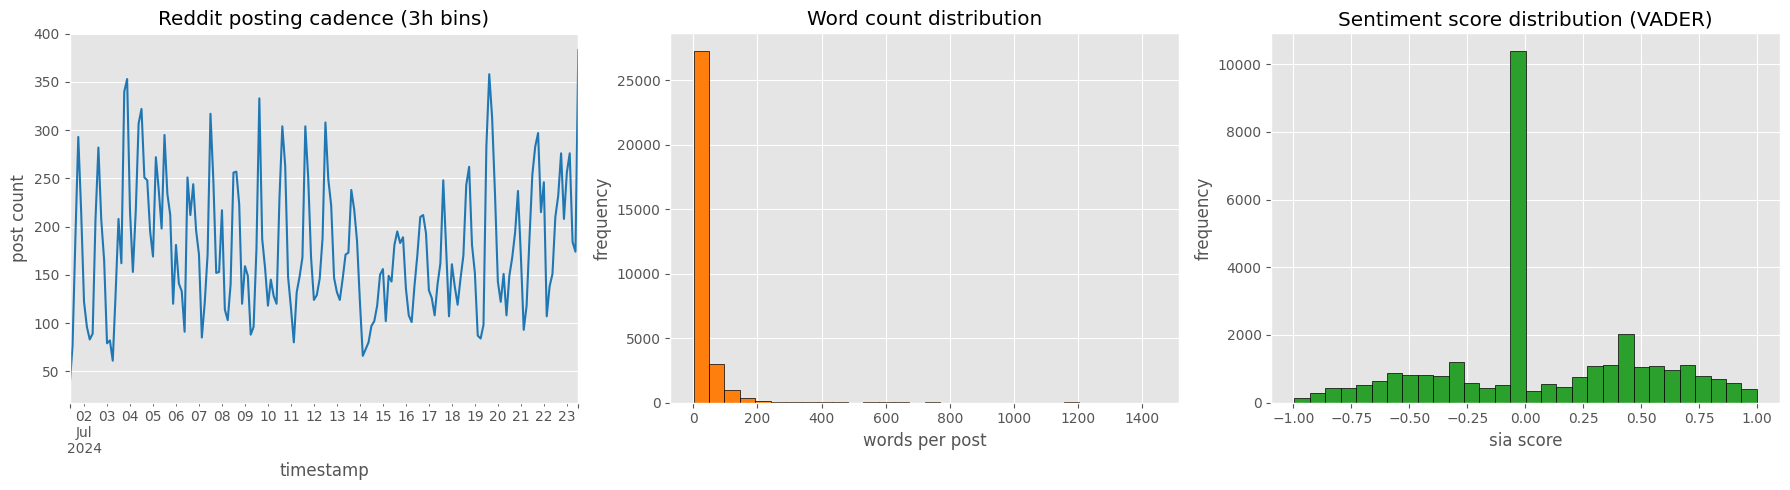

,token,tfidf_weight
0,crypto,512.577031
1,btc,423.598667
2,bitcoin,344.475982
3,removed,341.184049
4,deleted,337.981227
5,buy,313.972078
6,money,298.999681
7,think,290.044094
8,good,289.096692
9,know,276.309952


In [7]:
import re
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

plt.style.use('ggplot')

for pkg in ('stopwords', 'punkt', 'wordnet'):
    try:
        nltk.data.find(f'corpora/{pkg}' if pkg != 'punkt' else f'tokenizers/{pkg}')
    except LookupError:
        nltk.download(pkg)

STOP_WORDS = set(stopwords.words('english'))
DOMAIN_STOP_WORDS = {
    "amp","im","dont","lol","gonna","hey","okay","really","still","thing","stuff","maybe",
    "said","says","say","make","made","could","should","would","cant","wanna","people","guys",
    "everyone","anyone","someone","something","nothing","like","time","get","one","two","need",
    "got","didnt","yeah","kinda","sorta"
}
STOP_WORDS |= DOMAIN_STOP_WORDS
lemmatizer = WordNetLemmatizer()


def tokenize_and_filter(doc: str):
    doc = re.sub(r'[^a-zA-Z0-9$ ]+', ' ', str(doc).lower())
    tokens = nltk.word_tokenize(doc)
    cleaned = []
    for tok in tokens:
        tok = tok.strip('$')
        if not tok or len(tok) <= 2:
            continue
        if tok.isdigit() or tok in STOP_WORDS:
            continue
        cleaned.append(lemmatizer.lemmatize(tok))
    return cleaned


# Posting cadence per 3 hour window
cadence = df.set_index('created_utc').resample('3H')['text'].count()

vectorizer = TfidfVectorizer(analyzer=tokenize_and_filter, min_df=1)
tfidf_matrix = vectorizer.fit_transform(df['text'])
term_scores = tfidf_matrix.sum(axis=0).A1
feature_names = vectorizer.get_feature_names_out()
order = np.argsort(term_scores)[::-1][:15]
common_tokens = pd.DataFrame(
    {
        'token': feature_names[order],
        'tfidf_weight': term_scores[order]
    }
)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

cadence.plot(ax=axes[0], color='#1f77b4')
axes[0].set_title('Reddit posting cadence (3h bins)')
axes[0].set_xlabel('timestamp')
axes[0].set_ylabel('post count')

axes[1].hist(df['word_count'], bins=30, color='#ff7f0e', edgecolor='black')
axes[1].set_title('Word count distribution')
axes[1].set_xlabel('words per post')
axes[1].set_ylabel('frequency')

axes[2].hist(df['sia'], bins=30, color='#2ca02c', edgecolor='black')
axes[2].set_title('Sentiment score distribution (VADER)')
axes[2].set_xlabel('sia score')
axes[2].set_ylabel('frequency')

plt.tight_layout()
plt.show()

common_tokens

**Observations**

* Posting cadence shows a clear burst pattern (3-hour bins oscillating between ~50 – 350 posts), which is typical during short-lived market catalysts.
Maintain cadence baselines for production monitoring to detect API rate-limit stalls or data ingestion gaps.

* Word count distribution is highly right-skewed: the majority of posts are under 100 words with a sparse long-tail of multi-hundred-word entries.
Those tails are likely commentary digests or automated reposts; flag them for separate inspection instead of mixing with short reactive chatter.

* VADER sentiment centers sharply at 0, forming a spike of neutral posts, with symmetric flanks toward positive and negative extremes.
This indicates low net polarity but high dispersion—sentiment classification should use calibrated thresholds rather than simple sign checks.

* TF-IDF vocabulary highlights finance-specific terms (crypto, btc, bitcoin) dominating the corpus



## 7. Literature Signals and Follow Up Reading

Recent studies leveraging social-media alternative data include:
- Bartov, E., Faurel, L., & Mohanram, P. (2018). Can Twitter help predict firm-level earnings and stock returns? *The Accounting Review, 93*(3), 25–57. https://doi.org/10.2308/accr-51865
- Bollen, J., Mao, H., & Zeng, X. (2011). Twitter mood predicts the stock market. *Journal of Computational Science, 2*(1), 1–8. https://doi.org/10.1016/j.jocs.2010.12.007
- Mai, F., Shan, Z., Bai, Q., Wang, X., & Chiang, R. H. L. (2018). How does social media impact Bitcoin value? A test of the silent majority hypothesis. *Journal of Management Information Systems, 35*(1), 19–52. https://doi.org/10.1080/07421222.2018.1440774
- Sprenger, T. O., Tumasjan, A., Sandner, P. G., & Welpe, I. M. (2014). Tweets and trades: The information content of stock microblogs. *European Financial Management, 20*(5), 926–957. https://doi.org/10.1111/j.1468-036X.2013.12027.x
- Sun, Y., Liu, L., Xu, Y., Zeng, X., Shi, Y., Hu, H., Jiang, J., & Abraham, A. (2024). Alternative data in finance and business: Emerging applications and theory analysis (review). *Financial Innovation, 10*, 127. https://jfin-swufe.springeropen.com/articles/10.1186/s40854-024-00652-0

These works provide a foundation for methodological and compliance references in behavioral-data research

## Conclusion

Social-media data lie at the intersection of timeliness, investor sentiment, and narrative-driven market behavior.

By mapping reliable sources, defining quality controls, and embedding ethical checkpoints, practitioners can use such datasets responsibly.

The workflow presented—covering data ingestion, quality diagnostics, cadence and sentiment visualization, and literature linkage—offers a reproducible template suitable for both exploratory analytics and formal documentation.